In [158]:
import torch
import torchvision
from torch.utils import data
import torchvision.transforms as transforms
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision.utils import save_image

In [2]:
class Dataset(data.Dataset):

    #def __init__(self, list_IDs, labels):
    #    self.list_IDs = list_IDs

    def __len__(self):
        return 400#len(self.list_IDs)

    def __getitem__(self, index):
        #ID = self.list_IDs[index]

        # Load data and get label
        X = np.load('data/data' + str(index) + '.npy')
        y = np.load('data/label' + str(index) + '.npy')

        return X, y

IndentationError: expected an indented block (<ipython-input-2-771bee8c4036>, line 5)

In [147]:
data_transforms = {
    'train' : transforms.Compose([
                transforms.Resize(1000),
                #transforms.CenterCrop((500,500)),
                transforms.ToTensor(),
                #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ])}

In [148]:
datadir = 'characters\greek'
image_datasets = {'train' : torchvision.datasets.ImageFolder(os.path.join(datadir, 'train'), data_transforms['train'])}
data_loaders = {'train' : torch.utils.data.DataLoader(image_datasets['train'], batch_size=1, shuffle=False)}

In [206]:
w = None
for q in data_loaders['train']:
    w = q[0][:,:,450:,200:800]
    #plt.imshow(np.transpose(w.detach().numpy(), (1,2,0)))
    #plt.show()

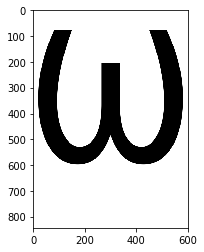

In [178]:
plt.imshow(np.transpose(w[0].detach().numpy(), (1,2,0)))

In [348]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 2, kernel_size=30),
            nn.ReLU(True),
            nn.Conv2d(2,16,kernel_size=30),
            nn.ReLU(True)
        )
        self.decoder = nn.Sequential(             
            nn.ConvTranspose2d(16,2,kernel_size=30),
            nn.ReLU(True),
            nn.ConvTranspose2d(2,3,kernel_size=30),
            nn.ReLU(True),
            nn.Sigmoid())
            
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [349]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [364]:
model = Autoencoder().to(device)
distance = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),weight_decay=1e-4)

In [365]:
MAX_EPOCHS = 10
for epoch in range(MAX_EPOCHS):
    for data in data_loaders['train']:
        img = data[0][:,:,450:,200:800]
        img = Variable(img).to(device)
        # ===================forward=====================
        output = model(img)
        loss = distance(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, MAX_EPOCHS, loss.item()))

epoch [1/10], loss:0.2057
epoch [2/10], loss:0.1976
epoch [3/10], loss:0.1526
epoch [4/10], loss:0.1379
epoch [5/10], loss:0.1366
epoch [6/10], loss:0.1310
epoch [7/10], loss:0.1273
epoch [8/10], loss:0.1266
epoch [9/10], loss:0.0688
epoch [10/10], loss:0.0651


In [366]:
w

tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]], device='cuda:0')

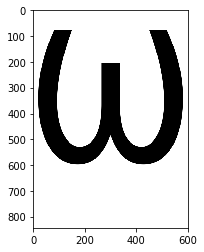

In [367]:
plt.imshow(np.transpose(w[0].to('cpu').detach().numpy(), (1,2,0)))

In [368]:
w = w.to(device)

In [369]:
out = model(w)

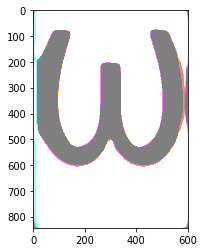

In [370]:
plt.imshow(np.transpose(out[0].to('cpu').detach().numpy(), (1,2,0)))

In [371]:
list(model.encoder)

[Conv2d(3, 2, kernel_size=(30, 30), stride=(1, 1)),
 ReLU(inplace),
 Conv2d(2, 16, kernel_size=(30, 30), stride=(1, 1)),
 ReLU(inplace)]

In [372]:
embedds = nn.Sequential(* list(model.encoder)[0:4])(w)

print(embedds.shape)

torch.Size([1, 16, 786, 542])


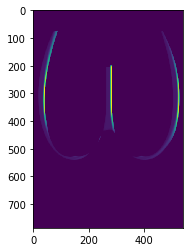

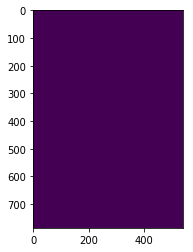

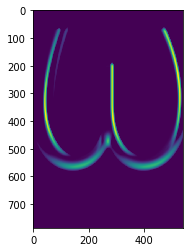

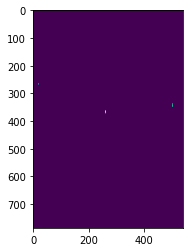

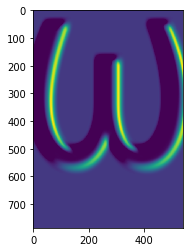

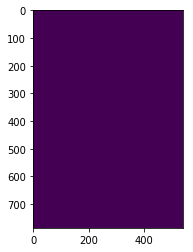

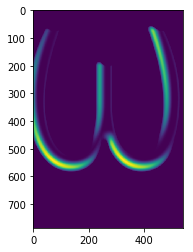

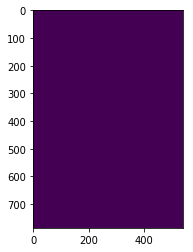

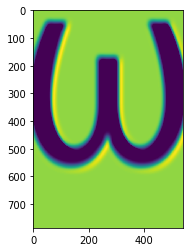

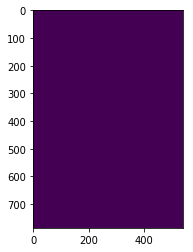

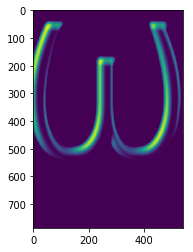

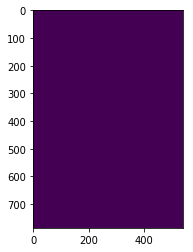

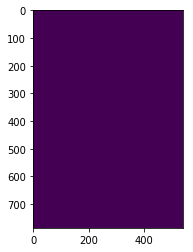

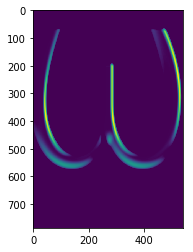

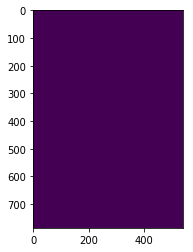

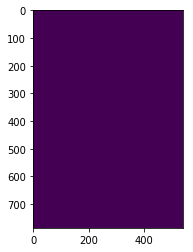

In [373]:
for img in embedds[0]:
    plt.imshow(img.to('cpu').detach().numpy())
    plt.show()

In [218]:
embedds[0].to('cpu').detach().numpy().shape

(16, 836, 592)

TypeError: Invalid dimensions for image data

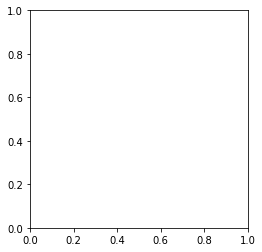

In [217]:
plt.imshow(np.transpose(embedds[0].to('cpu').detach().numpy(), (1,2,0)))

In [ ]:
data_dir = 'data/problem2/'
image_datasets = {x : torchvision.datasets.ImageFolder(os.path.join(data_dir,x), data_transforms[x]) for x in ['train', 'val']}

# In[21]:

dataloaders = {x : torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True) for x in ['train', 'val']}